In [2]:
import sys 
import os
sys.path.append(os.path.abspath("/home/pcs/patrick/Dokumente/Github/colormap/"))
import colormaps as cmaps


In [3]:
import numpy as np
import scipy.constants as cs
import scipy.special as ss
import scipy.optimize as so
from matplotlib import pyplot as plt
from matplotlib import cm
from qkit.qkit.gui.notebook.Progress_Bar import Progress_Bar as pb
from scipy.integrate import dblquad
from scipy import integrate

%matplotlib inline

In [4]:
#customized plots:
import matplotlib 
matplotlib.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
matplotlib.rc('text', usetex=True)

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}
matplotlib.rc('font', **font)
matplotlib.rcParams['figure.figsize'] = (8.0,5.0)
matplotlib.rcParams['savefig.dpi'] = 100
matplotlib.rcParams['legend.shadow'] = True
matplotlib.rcParams['savefig.bbox'] = 'tight'


cmap_virdis = cmaps.viridis.colors


In [5]:
labelsize = 27

In [6]:
mu_0 = cs.mu_0
mu_B = cs.physical_constants['Bohr magneton'][0]   #Bohr magneton in SI units
k_b = cs.k

In [7]:
ss.lambertw(0).real

0.0

In [8]:
def F(alpha,x):
    x = 0.25
    return np.log(x)-(ss.psi(1/2.)-ss.psi(1/2.+alpha/x))

In [9]:
def f(x):
    return x**2-x**3-1.

In [10]:
x = 0.25
so.newton(lambda alpha: np.log(x)-(ss.psi(1/2.)-ss.psi(1/2.+alpha/x)), 0.25, maxiter = 50)

0.12500000000000003

In [11]:
x_range = np.linspace(0.01,1,100)

In [24]:
T_c = []
for x in x_range:
    T_c.append(so.newton(lambda alpha: np.log(x)-(ss.psi(1/2.)-ss.psi(1/2.+1.76*alpha/(2.*np.pi*x))), 0.1, maxiter = 500))
T_c = np.array(T_c) 

In [81]:
alpha_range =  np.linspace(0,0.99,10)

In [82]:
DELTA = []
for alpha in alpha_range:
    DELTA.append(so.newton(lambda x: np.log(x)+np.pi*alpha/(4.*x), 0.99, tol = 0.001 , maxiter = 10000))
DELTA = np.array(DELTA)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in log
  app.launch_new_instance()


RuntimeError: Failed to converge after 10000 iterations, value is nan

In [69]:
DELTA = []
for x in x_range:
    DELTA.append(so.newton(lambda alpha: np.log(x)+np.pi*alpha/(4.*x), 1.0, tol = 0.01 , maxiter = 10000))
DELTA = np.array(DELTA)

In [70]:
np.array(DELTA).shape

(100,)

In [183]:
x0_ = np.linspace(0.2,0.6, 100)

In [191]:
alpha = 0.9
for x1 in x0_:
    try: 
        print so.newton(lambda x: np.log(x)+np.pi*alpha/(4.*x), x0 = x1, tol = 0.001 , maxiter = 100000)
        
    except: print 'error'

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in log


error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


In [154]:
so.minimize(lambda x: np.log(x)+np.pi*alpha/(4.*x), 0.01)

   status: 2
  success: False
     njev: 22
     nfev: 78
 hess_inv: array([[-1045.00302293]])
      fun: array([ 3.47316025])
        x: array([ 31.45122812])
  message: 'Desired error not necessarily achieved due to precision loss.'
      jac: array([ 0.03100923])

In [133]:
so.minimize()

(0, 1)

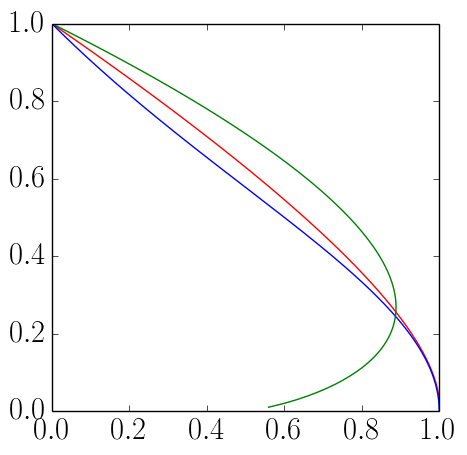

In [77]:
x = np.linspace(0,1,1000)
plt.figure(figsize = (5,5))
plt.plot(2.*np.array(T_c), x_range, color = 'red')
#plt.plot(x,(-np.pi*x/8.)/ss.lambertw(-np.pi*x/8.).real)
#plt.plot(x, np.exp(ss.lambertw(-np.pi*x/8.)))
plt.plot(x, np.sqrt((1-x)/(1+x)), color = 'blue')
plt.plot(DELTA+T_c, x_range, color = 'green')
plt.xlim(0,1)

In [80]:
np.log(1)

0.0